In [1]:
import numpy as np
import matplotlib
from matplotlib import rcParams
import matplotlib.pyplot as plt

from skimage.color import rgb2gray
from scipy.io import loadmat

In [ ]:
# plt.imsave('./ncc.png', ncc, cmap=plt.get_cmap('inferno'))

In [2]:
def metric_xsection(arr):
    y, x = np.unravel_index(np.argmax(arr, axis=None), arr.shape)
    return arr[:, x]

In [3]:
stitching_data = loadmat('./xc_ac.mat')
xc_big = stitching_data['xcorr_overlap_big']
xc_small = stitching_data['xcorr_overlap_small']
ac = stitching_data['autocorr']

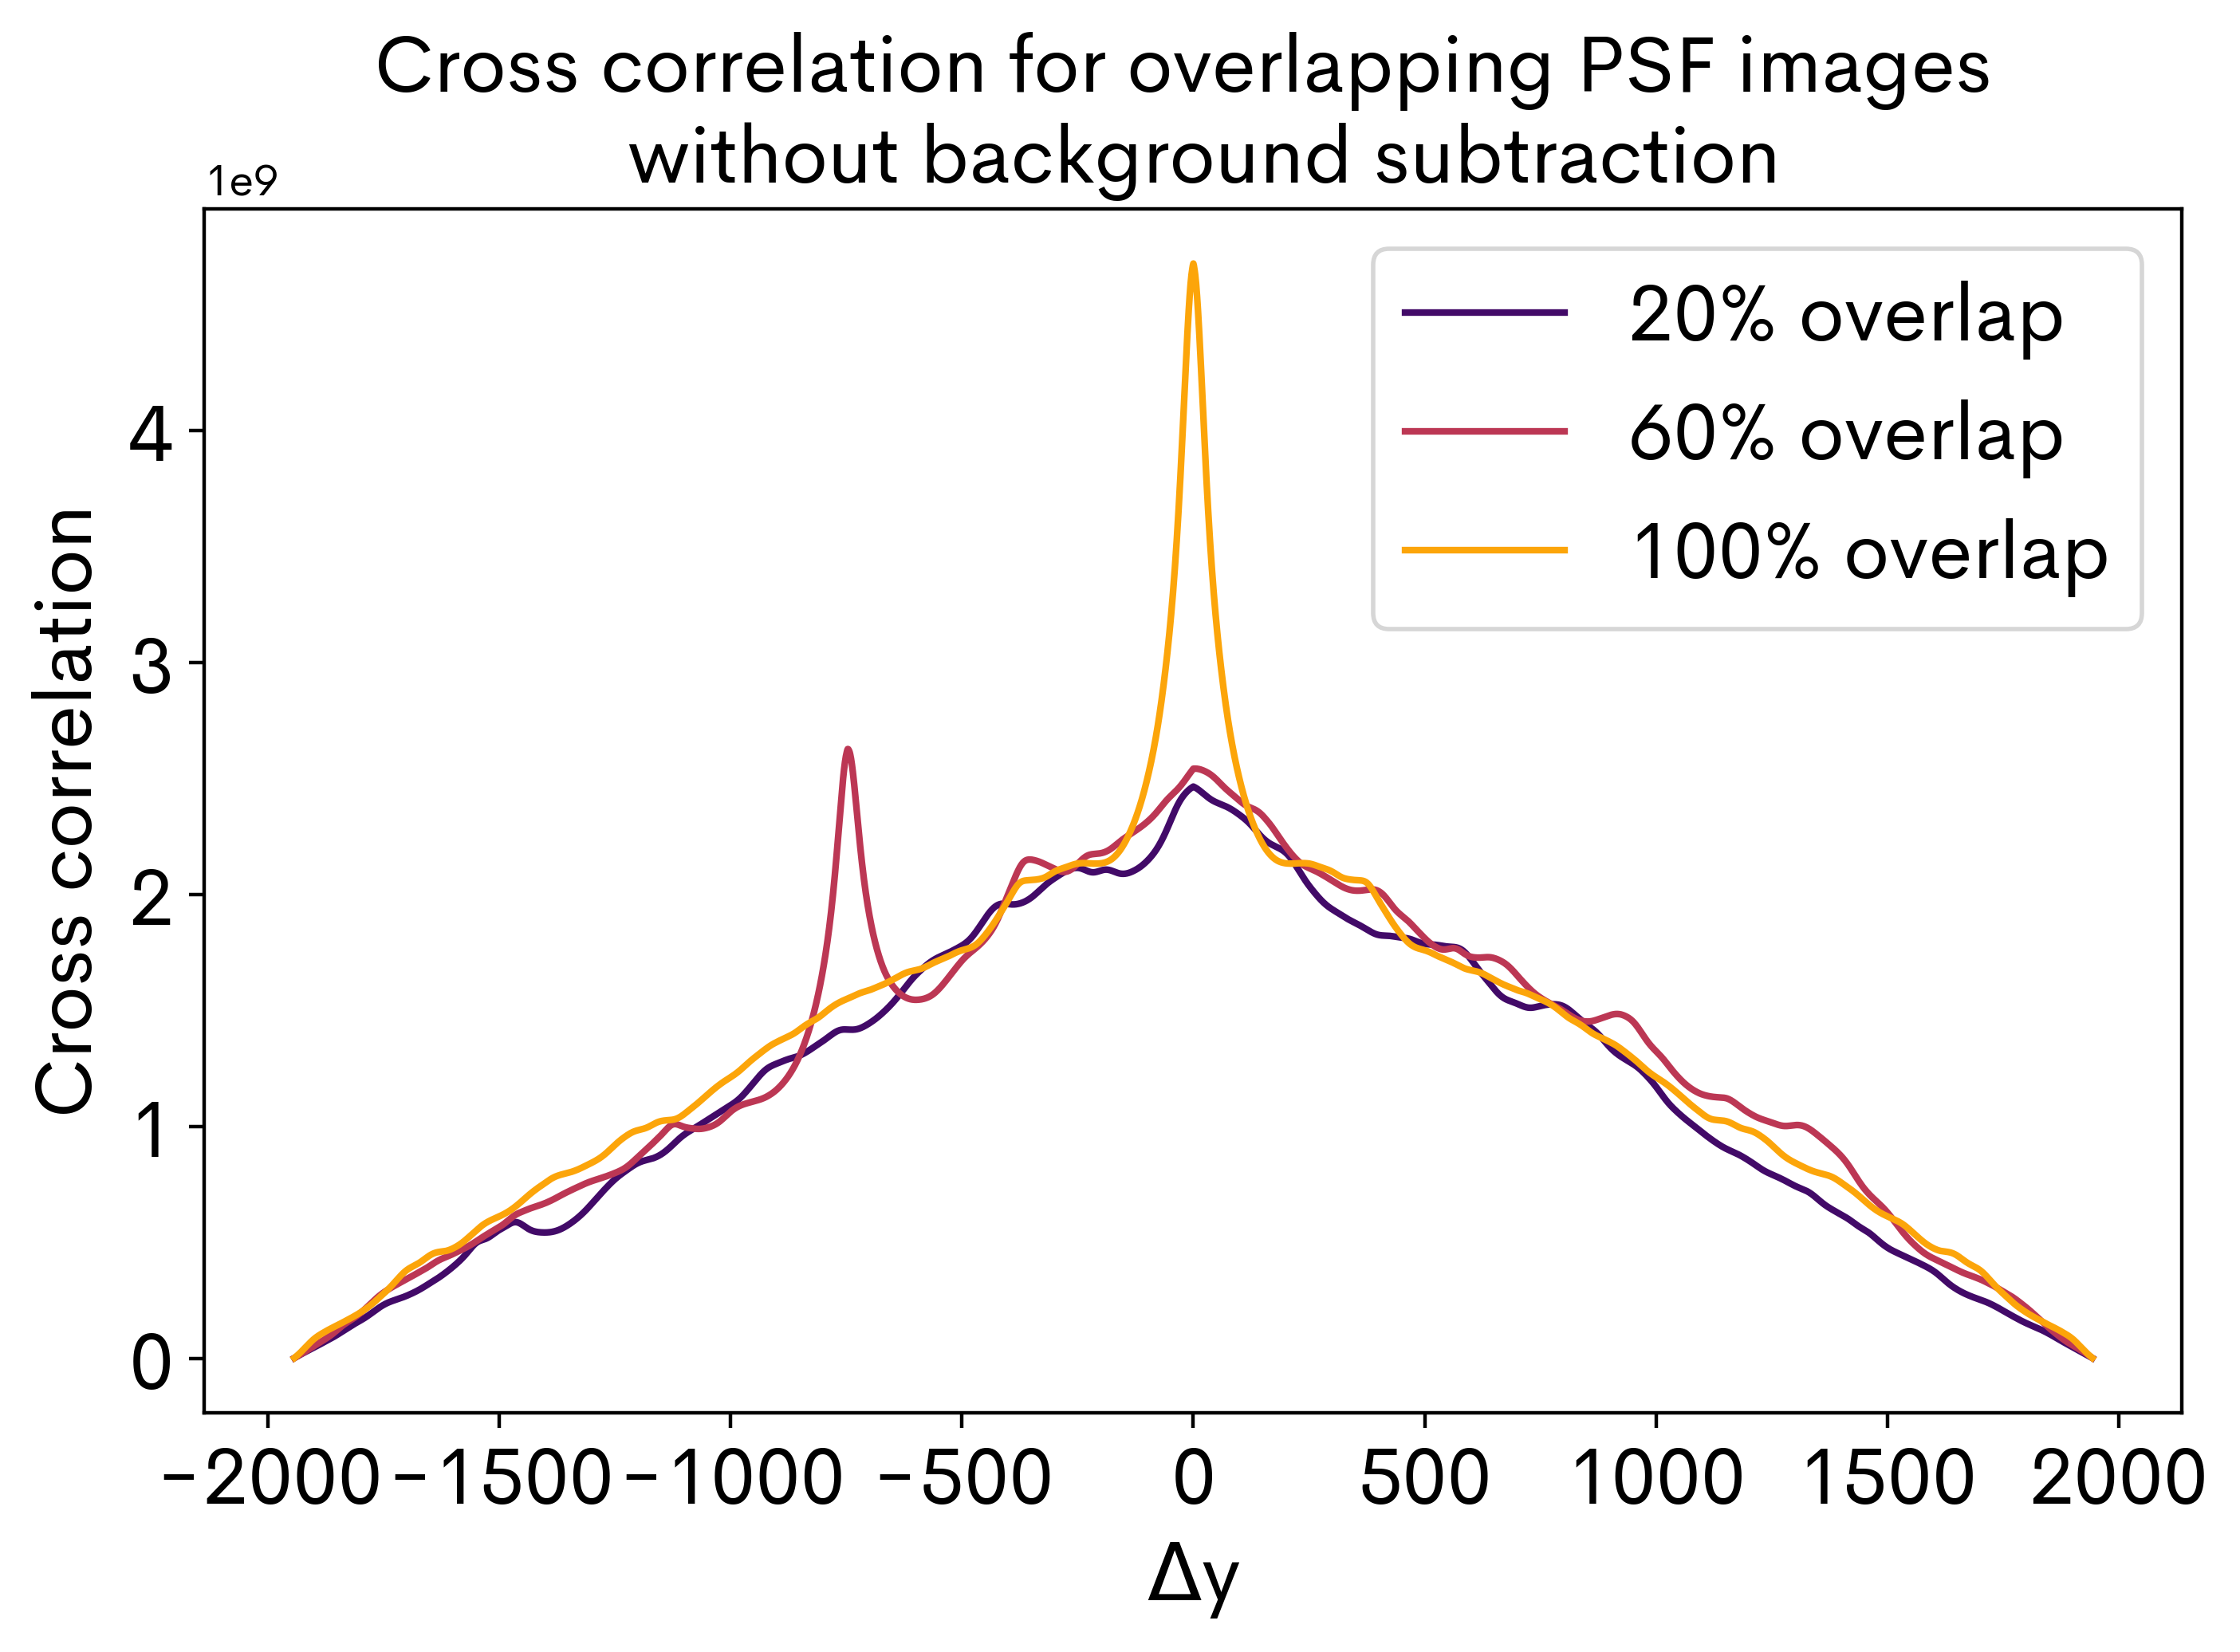

In [5]:
cmap = plt.get_cmap('inferno')
matplotlib.rcParams['figure.dpi'] = 400
fp = matplotlib.font_manager.FontProperties(fname='/Users/Ellin/Library/Fonts/CerebriSans-Regular.ttf')
plt.figure(figsize=(8, 5));

plt.plot(np.arange(-np.floor(3887/2), 3887/2), metric_xsection(xc_small), color=cmap(0.2));
plt.plot(np.arange(-np.floor(3887/2), 3887/2), metric_xsection(xc_big), color=cmap(0.5));
plt.plot(np.arange(-np.floor(3887/2), 3887/2), metric_xsection(ac), color=cmap(0.8));
plt.xticks(fontproperties=fp, fontsize=18);
plt.yticks(fontproperties=fp, fontsize=18);
plt.xlabel(r'$\Delta$y', fontproperties=fp, fontsize=18)
plt.ylabel('Cross correlation', fontproperties=fp, fontsize=18);
plt.title('Cross correlation for overlapping PSF images \n without background subtraction', fontproperties=fp, fontsize=18);
plt.gca().xaxis.get_offset_text().set_fontproperties(fp);
plt.gca().yaxis.get_offset_text().set_fontproperties(fp);
plt.legend(['20% overlap', '60% overlap', '100% overlap'], prop={'fname':'/Users/Ellin/Library/Fonts/CerebriSans-Regular.ttf', 'size':'18'});
plt.savefig('./metric.png')

# NCC vs. Canny

In [6]:
stitching_data = loadmat('./ncc_edge.mat')
stitching_data2 = loadmat('./xcorr_mean.mat')
xcorr = stitching_data2['xcorr_mean']
canny = stitching_data['xcorr']

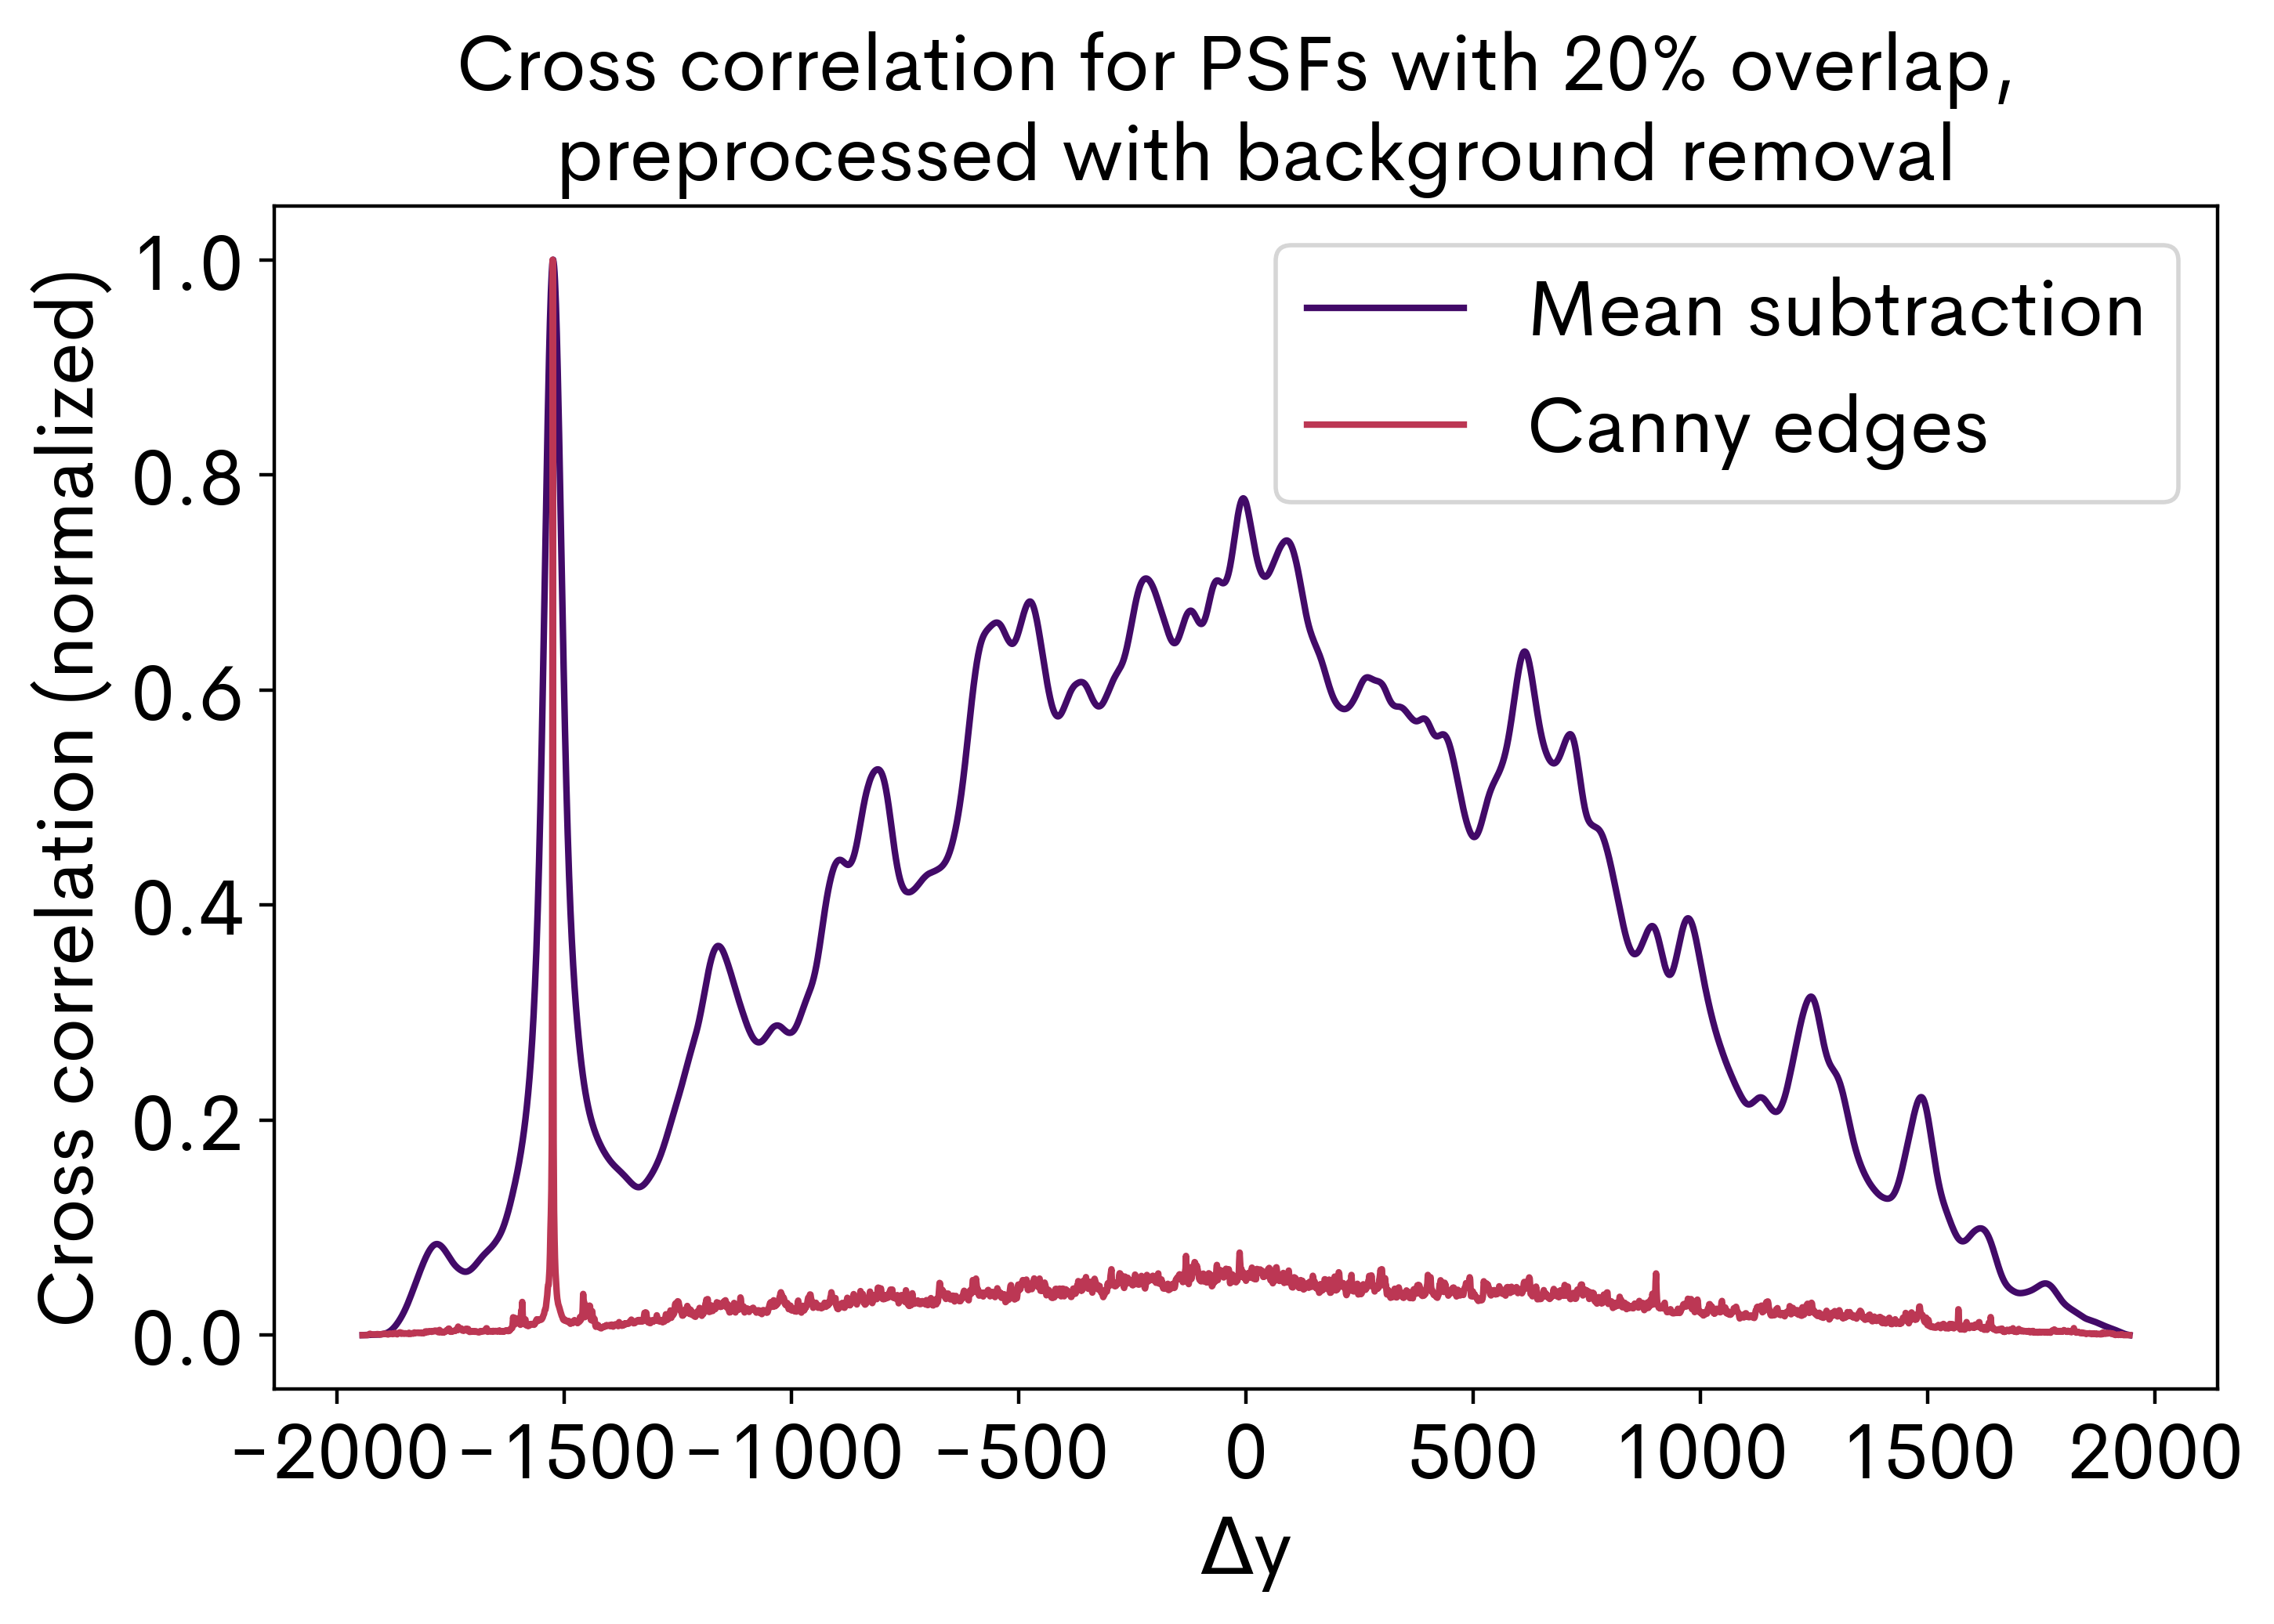

In [17]:
cmap = plt.get_cmap('inferno')
fp = matplotlib.font_manager.FontProperties(fname='/Users/Ellin/Library/Fonts/CerebriSans-Regular.ttf')
plt.figure(figsize=(8, 5));
matplotlib.rcParams['figure.dpi'] = 400

plt.plot(np.arange(-np.floor(3887/2), 3887/2), metric_xsection(xcorr)/np.max(metric_xsection(xcorr)), color=cmap(0.2));
plt.plot(np.arange(-np.floor(3887/2), 3887/2), metric_xsection(canny)/np.max(metric_xsection(canny)), color=cmap(0.5));
plt.xticks(fontproperties=fp, fontsize=18);
plt.yticks(fontproperties=fp, fontsize=18);
plt.xlabel(r'$\Delta$y', fontproperties=fp, fontsize=18)
plt.ylabel('Cross correlation (normalized)', fontproperties=fp, fontsize=18);
plt.title('Cross correlation for PSFs with 20% overlap, \n preprocessed with background removal', fontproperties=fp, fontsize=18);
plt.gca().xaxis.get_offset_text().set_fontproperties(fp);
plt.legend(['Mean subtraction', 'Canny edges'], prop={'fname':'/Users/Ellin/Library/Fonts/CerebriSans-Regular.ttf', 'size':'18'});
plt.savefig('./ncc_edge_compare.png')

In [ ]:
# canny + xcorr: 186.118813 seconds
# ncc 297.358936 seconds.
